In [1]:
import fix_yahoo_finance as yf
from pytrends.request import TrendReq

import pandas as pd
import datetime as dt
import numpy as np
import glob

import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
# sns.set()

import plotly.plotly as py
import plotly.graph_objs as go

# Read data

In [2]:
# Moody ratings from Eunice (Bloomberg)
df_moody = pd.read_excel('EDA_data/Columbia DSIC 2018 - Moody\'s data.xlsx')
df_moody = df_moody.sort_values(by=['Company', 'Effective Date'])
df_moody = df_moody.reset_index()

# Replace 'WR' for Verizon with the previous rating o A1
df_moody[df_moody["Moody's Rating"]=='WR']
df_moody["Moody's Rating"].iloc[67] = 'A1'
df_moody["Moody's Rating"].unique()

/Users/ola/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



array(['B1', 'Ba2', 'Ba1', 'Baa3', 'Baa2', 'Baa1', 'Aaa', 'Aa1', 'Aa3',
       'A1', 'A2', 'A3', 'Ba3'], dtype=object)

In [3]:
print(df_moody.shape, df_moody.dtypes)
df_moody.head(3)

(72, 6) index                      int64
Company                   object
Moody's Rating            object
Watch                     object
Type                      object
Effective Date    datetime64[ns]
dtype: object


,index,Company,Moody's Rating,Watch,Type,Effective Date
0,8,21st Century Fox America,B1,NaN,up,1991-11-27
1,7,21st Century Fox America,Ba2,NaN,up,1992-10-09
2,6,21st Century Fox America,Ba1,NaN,up,1993-10-14


In [4]:
# Moody ratings directly from Moody's
df_moody_ola = pd.read_excel('EDA_data/Moodys_Ola.xlsx')
print(df_moody_ola.shape, df_moody_ola.dtypes)
df_moody_ola.head(3)

(37, 5) Date             datetime64[ns]
Currency                 object
Rating                   object
Rating Action            object
Company                  object
dtype: object


,Date,Currency,Rating,Rating Action,Company
0,2018-06-15,Foreign,Baa2,Downgrade,AT&T Corp
1,2016-10-24,Foreign,Baa1,On Watch - Possible Downgrade,AT&T Corp
2,2016-08-29,Foreign,Baa1,RATING AFFIRMATION,AT&T Corp


In [5]:
# NASDAQ downloaded by Ola from Yahoo
# https://finance.yahoo.com/quote/%5Eixic/history/
df_nasdaq = pd.read_csv('EDA_data/IXIC.csv', index_col='Date')
print(df_nasdaq.shape, df_nasdaq.dtypes)
df_nasdaq.head(3)

(6243, 6) Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1994-01-03,774.109985,777.289978,768.409973,770.760010,770.760010,253020000
1994-01-04,771.429993,774.780029,771.020020,774.280029,774.280029,298600000
1994-01-05,775.229980,778.210022,773.690002,778.049988,778.049988,349880000


In [6]:
# stock prices - from Yahoo finance
tickers = ['FOXA', 'T', 'CBS', 'CMCSA', 'VZ', 'VIA']
start = dt.datetime(1994,1,1)
end = dt.datetime(2018,10,16)
df_stock = yf.download(tickers, start=start, end=end)
print(df_stock.shape, df_stock.dtypes)
df_stock.tail(3)

[*********************100%***********************]  6 of 6 downloaded
(6243, 36) Open       CBS      float64
           CMCSA    float64
           FOXA     float64
           T        float64
           VIA      float64
           VZ       float64
High       CBS      float64
           CMCSA    float64
           FOXA     float64
           T        float64
           VIA      float64
           VZ       float64
Low        CBS      float64
           CMCSA    float64
           FOXA     float64
           T        float64
           VIA      float64
           VZ       float64
Close      CBS      float64
           CMCSA    float64
           FOXA     float64
           T        float64
           VIA      float64
           VZ       float64
Adj Close  CBS      float64
           CMCSA    float64
           FOXA     float64
           T        float64
           VIA      float64
           VZ       float64
Volume     CBS      float64
           CMCSA      int64
           FOXA     flo

Open                                                         \
                  CBS      CMCSA       FOXA          T        VIA         VZ   
Date                                                                           
2018-10-12  54.380001  34.049999  45.299999  32.189999  35.080002  53.820000   
2018-10-15  53.939999  34.610001  45.450001  32.270000  34.389999  53.880001   
2018-10-16  54.619999  35.220001  45.599998  32.369999  35.119999  53.459999   

                 High                                     ...     Adj Close  \
                  CBS      CMCSA       FOXA          T    ...          FOXA   
Date                                                      ...                 
2018-10-12  54.779999  34.790001  45.500000  32.360001    ...     45.360001   
2018-10-15  54.930000  35.669998  45.869999  32.669998    ...     45.520000   
2018-10-16  55.290001  36.099998  46.029999  32.470001    ...     45.950001   

                                                Volume                       \
                    T        VIA         VZ        CBS     CMCSA       FOXA   
Date                                                                          
2018-10-12  32.250000  34.410000  53.730000  2642000.0  31439300  7426000.0   
2018-10-15  32.360001  35.060001  53.599998  1717700.0  22877300  6330300.0   
2018-10-16  32.389999  36.009998  53.700001  5031600.0  26282200  6584300.0   

                                         
                   T      VIA        VZ  
Date                                     
2018-10-12  43151600  23900.0  18866600  
2018-10-15  33242600  14400.0  13022000  
2018-10-16  28048700  16800.0  15981200  

[3 rows x 36 columns]

In [7]:
# OAS from Eunice
df_oas = pd.read_excel('EDA_data/data_OAS_columbiaU_july2018.xls', index_col='Date')
print(df_oas.shape, df_oas.dtypes)
df_oas.head(3)

(1653, 5) VZ 5.15 09/15/2023:OAS        float64
T 2.625 12/01/2022:OAS        float64
CMCSA 2.875 01/15/2023:OAS    float64
CBS 3.375 03/01/2022:OAS      float64
FOXA 3.0 09/15/2022:OAS       float64
dtype: object


,VZ 5.15 09/15/2023:OAS,T 2.625 12/01/2022:OAS,CMCSA 2.875 01/15/2023:OAS,CBS 3.375 03/01/2022:OAS,FOXA 3.0 09/15/2022:OAS
Date,,,,,
2018-07-09,92.68173,108.486595,93.50954,110.08555,78.866585
2018-07-06,95.16908,112.340270,100.11442,110.24977,82.111620
2018-07-05,101.53269,114.571190,102.46219,114.16346,87.219580


In [8]:
# Sec filings metadata
sec_dict = dict()

for file in glob.glob('columbiaDSCap_sec_files_2018_rev100218/*csv'):
    df = pd.read_csv(file)
    
    df.findexdate = pd.to_datetime(df.findexdate)
    
    if 'comcast' in file:
        sec_dict['Comcast Corp'] = df
    if 'cbs' in file:
        sec_dict['CBS Corp'] = df
    if 'att' in file:
        sec_dict['AT&T Corp'] = df
    if 'fox' in file:
        sec_dict['21st Century Fox America'] = df
    if 'verizon' in file:
        sec_dict['Verizon Communications Inc'] = df

In [9]:
# google trends
pytrends = TrendReq(hl='en-US', tz=360)

kw_list = ['"21st Century Fox"', '"News Corporation"',
          '"Southwestern Bell"', '"SBC Communications"', 'AT&T',
          'Viacom', 'CBS',
          '"AT&T Comcast"', 'Comcast',
          '"Bell Atlantic"', 'Verizon']

# get monthly since 2004 ------------------------------------------------
temp_list = ['21st Century Fox']
pytrends.build_payload(temp_list, cat=0, timeframe='all', geo='', gprop='')
index_temp = pytrends.interest_over_time().index

columns = []
for comp in kw_list:
    columns.append(comp.replace('"', ''))
    
df_all = pd.DataFrame(columns = columns, index = index_temp)

for comp in kw_list:
    pytrends.build_payload([comp], cat=0, timeframe='all', geo='', gprop='')    
    df_all[comp.replace('"', '')] = pytrends.interest_over_time()[comp]
    
# save to csv
df_all.to_csv('google_trends_2004.csv')

# get weekly fro the last 5 years  ---------------------------------------
temp_list = ['21st Century Fox']
pytrends.build_payload(temp_list, cat=0, timeframe='today 5-y', geo='', gprop='')
index_temp = pytrends.interest_over_time().index

columns = []
for comp in kw_list:
    columns.append(comp.replace('"', ''))
    
df_5y = pd.DataFrame(columns = columns, index = index_temp)

for comp in kw_list:
    pytrends.build_payload([comp], cat=0, timeframe='today 5-y', geo='', gprop='')    
    df_5y[comp.replace('"', '')] = pytrends.interest_over_time()[comp]
    
# save to csv
df_5y.to_csv('google_trends_5y.csv')

# load  ---------------------------------------------------------------------
df_gt_all = pd.read_csv('EDA_data/google_trends_2004.csv', index_col='date')
df_gt_5y = pd.read_csv('EDA_data/google_trends_5y.csv', index_col='date')

# add same sompany under different names
df_gt_all['21st Century Fox America'] = df_gt_all['21st Century Fox'] + df_gt_all['News Corporation']
df_gt_all['AT&T Corp'] = df_gt_all['Southwestern Bell'] + df_gt_all['SBC Communications'] + df_gt_all['AT&T']
df_gt_all['CBS Corp'] = df_gt_all['Viacom'] + df_gt_all['CBS']
df_gt_all['Comcast Corp'] = df_gt_all['AT&T Comcast'] + df_gt_all['Comcast']
df_gt_all['Verizon Communications Inc'] = df_gt_all['Bell Atlantic'] + df_gt_all['Verizon']

df_gt_5y['21st Century Fox America'] = df_gt_5y['21st Century Fox'] + df_gt_5y['News Corporation']
df_gt_5y['AT&T Corp'] = df_gt_5y['Southwestern Bell'] + df_gt_5y['SBC Communications'] + df_gt_5y['AT&T']
df_gt_5y['CBS Corp'] = df_gt_5y['Viacom'] + df_gt_5y['CBS']
df_gt_5y['Comcast Corp'] = df_gt_5y['AT&T Comcast'] + df_gt_all['Comcast']
df_gt_5y['Verizon Communications Inc'] = df_gt_5y['Bell Atlantic'] + df_gt_5y['Verizon']

# reset index
df_gt_5y.index = pd.to_datetime(df_gt_5y.index)
df_gt_all.index = pd.to_datetime(df_gt_all.index)

In [10]:
# WSJ news
wsj_dict = dict()

for file in glob.glob('EDA_data/*_scraped.csv'):
    
    df = pd.read_csv(file)
    
    df.rename(columns={"index": "headline"}, inplace=True)
    
    df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)
    
    df.date = pd.to_datetime(df.date)
        
    if 'Comcast' in file:
        wsj_dict['Comcast Corp'] = df
    if 'CBS' in file:
        wsj_dict['CBS Corp'] = df
    if 'AT&T' in file:
        wsj_dict['AT&T Corp'] = df
    if 'Fox' in file:
        wsj_dict['21st Century Fox America'] = df
    if 'Verizon' in file:
        wsj_dict['Verizon Communications Inc'] = df

# Data eng

In [11]:
# map categorical Moody to numerical for plotting

moody_ratings = ['Aaa', 'Aa1', 'Aa2', 'Aa3', 'A1', 'A2', 'A3', 'Baa1', 'Baa2', 'Baa3', 'Ba1', 'Ba2', 'Ba3', 'B1']
ratings_dict = dict(zip(moody_ratings, reversed(range(14))))
df_moody['num_rating'] = df_moody["Moody's Rating"].map(ratings_dict)
df_moody.head(3)

,index,Company,Moody's Rating,Watch,Type,Effective Date,num_rating
0,8,21st Century Fox America,B1,NaN,up,1991-11-27,0
1,7,21st Century Fox America,Ba2,NaN,up,1992-10-09,2
2,6,21st Century Fox America,Ba1,NaN,up,1993-10-14,3


In [12]:
df_moody_ola['num_rating'] = df_moody_ola['Rating'].map(ratings_dict)
df_moody_ola.head(3)

,Date,Currency,Rating,Rating Action,Company,num_rating
0,2018-06-15,Foreign,Baa2,Downgrade,AT&T Corp,5
1,2016-10-24,Foreign,Baa1,On Watch - Possible Downgrade,AT&T Corp,6
2,2016-08-29,Foreign,Baa1,RATING AFFIRMATION,AT&T Corp,6


In [13]:
# map company name to ticker
print(df_moody.Company.unique())
comp_to_tick = dict(zip(df_moody.Company.unique(), tickers))
comp_to_tick

['21st Century Fox America' 'AT&T Corp' 'CBS Corp' 'Comcast Corp'
 'Verizon Communications Inc']


{'21st Century Fox America': 'FOXA',
 'AT&T Corp': 'T',
 'CBS Corp': 'CBS',
 'Comcast Corp': 'CMCSA',
 'Verizon Communications Inc': 'VZ'}

In [14]:
# rename df_oas columns
print(df_oas.columns)
oas_comp = ['Verizon Communications Inc',
           'AT&T Corp',
           'Comcast Corp',
           'CBS Corp',
           '21st Century Fox America']

oas_comp_dict = dict(zip(df_oas.columns, oas_comp))
print(oas_comp_dict)

df_oas.columns = df_oas.columns.to_series().map(oas_comp_dict)
df_oas.head(3)

Index(['VZ 5.15 09/15/2023:OAS', 'T 2.625 12/01/2022:OAS',
       'CMCSA 2.875 01/15/2023:OAS', 'CBS 3.375 03/01/2022:OAS',
       'FOXA 3.0 09/15/2022:OAS'],
      dtype='object')
{'VZ 5.15 09/15/2023:OAS': 'Verizon Communications Inc', 'T 2.625 12/01/2022:OAS': 'AT&T Corp', 'CMCSA 2.875 01/15/2023:OAS': 'Comcast Corp', 'CBS 3.375 03/01/2022:OAS': 'CBS Corp', 'FOXA 3.0 09/15/2022:OAS': '21st Century Fox America'}


,Verizon Communications Inc,AT&T Corp,Comcast Corp,CBS Corp,21st Century Fox America
Date,,,,,
2018-07-09,92.68173,108.486595,93.50954,110.08555,78.866585
2018-07-06,95.16908,112.340270,100.11442,110.24977,82.111620
2018-07-05,101.53269,114.571190,102.46219,114.16346,87.219580


In [15]:
# Calc stock price delta for all companies: this day-previous day (open price used)
for comp in ['FOXA', 'T', 'CBS', 'CMCSA', 'VZ']:

    temp = [np.nan]
    for i in range(1,df_stock.shape[0]):
        temp.append(df_stock['Open'][comp].iloc[i] - df_stock['Open'][comp].iloc[i-1])

    df_stock[comp+'_diff'] = temp
    
df_stock.head(3)

Open                                        High                 \
            CBS     CMCSA FOXA        T VIA         VZ  CBS     CMCSA FOXA   
Date                                                                         
1994-01-03  NaN  4.013889  NaN  20.7500 NaN  26.698645  NaN  4.041667  NaN   
1994-01-04  NaN  3.861111  NaN  20.3750 NaN  26.024153  NaN  3.902778  NaN   
1994-01-05  NaN  3.861111  NaN  20.0625 NaN  25.405869  NaN  3.861111  NaN   

                       ...      Volume                            FOXA_diff  \
                  T    ...       CMCSA FOXA        T VIA       VZ             
Date                   ...                                                    
1994-01-03  20.9375    ...     4407000  NaN  1433400 NaN  1637800       NaN   
1994-01-04  20.5000    ...     4591800  NaN  1274600 NaN  1736500       NaN   
1994-01-05  20.1250    ...     5571000  NaN  3360600 NaN  2475700       NaN   

            T_diff CBS_diff CMCSA_diff   VZ_diff  
                                                  
Date                                              
1994-01-03     NaN      NaN        NaN       NaN  
1994-01-04 -0.3750      NaN  -0.152778 -0.674492  
1994-01-05 -0.3125      NaN   0.000000 -0.618284  

[3 rows x 41 columns]

# Plot

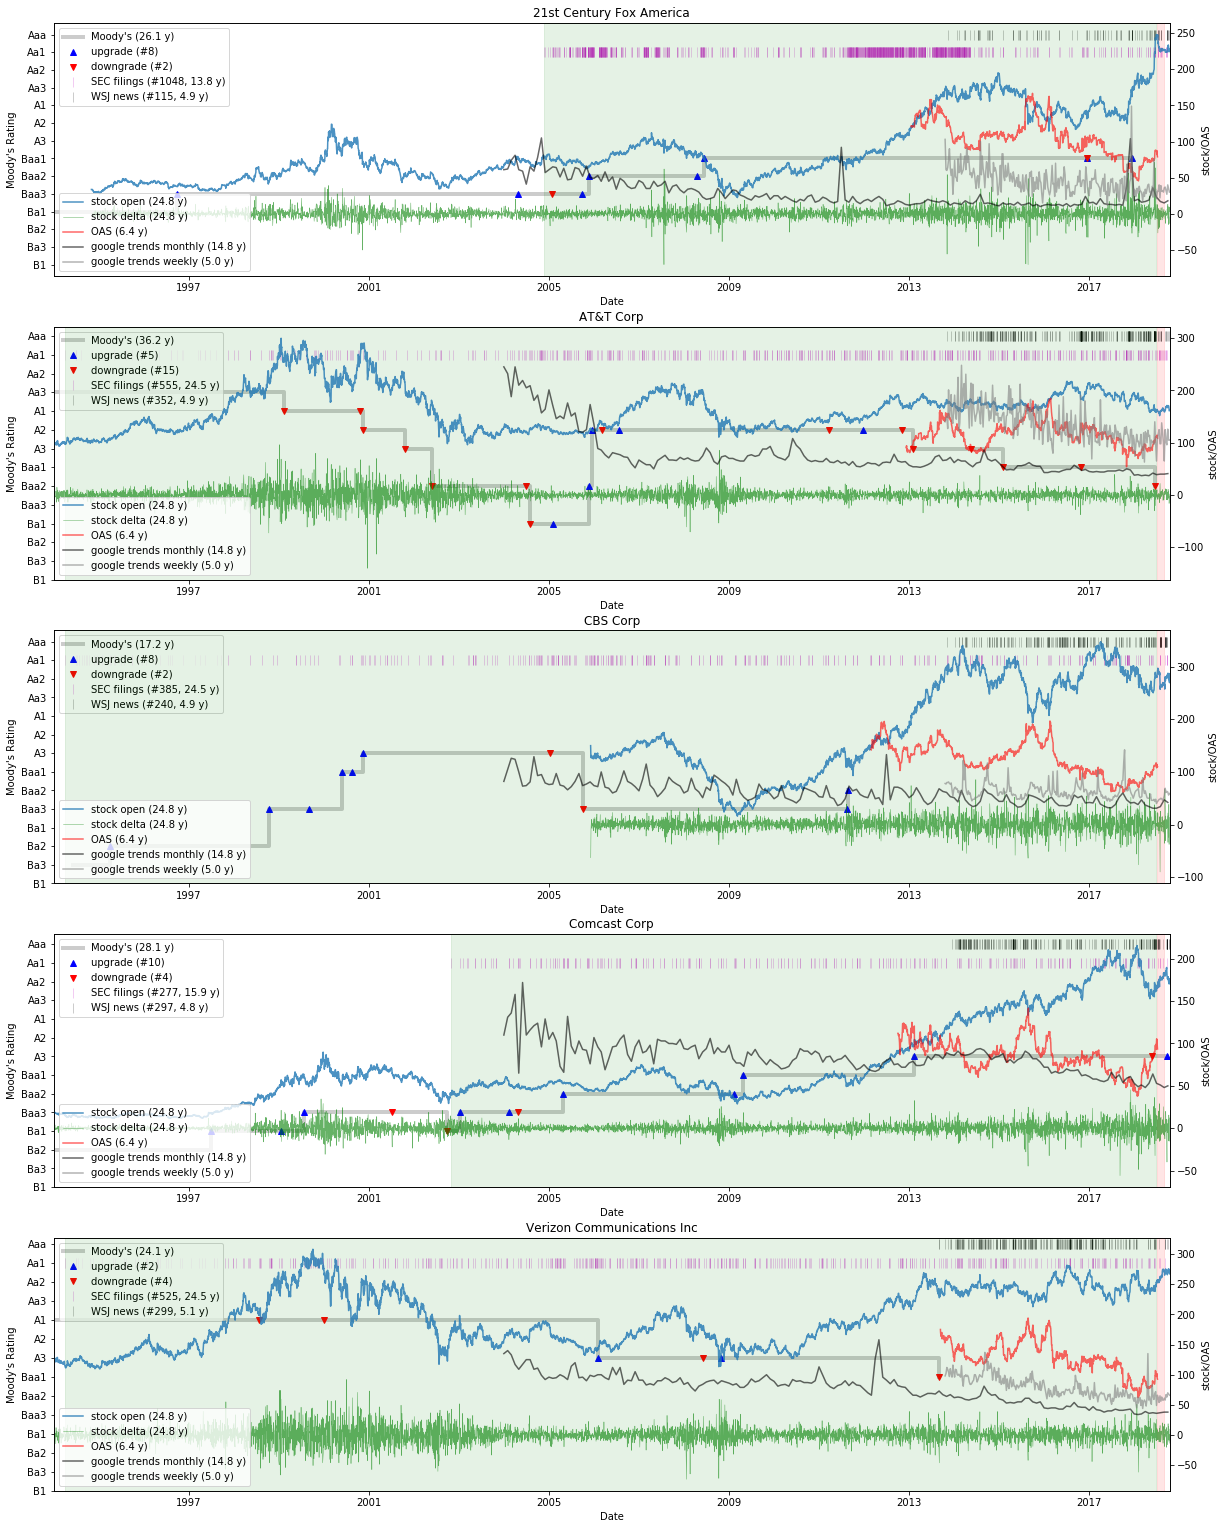

In [16]:
fig, axes = plt.subplots(5,1, figsize=(20,27))
axes = axes.ravel()

import seaborn as sns

for i, comp in enumerate(df_moody.Company.unique()):
    ax = axes[i]
    
    # plot Moody from Bloomberg
    df_temp = df_moody[df_moody.Company==comp]
    span = round((max(df_temp['Effective Date'])-min(df_temp['Effective Date'])).days/365*10)/10
    ax.step(df_temp['Effective Date'], df_temp.num_rating, color=[0.8, 0.8, 0.8], 
            where='post', linewidth=4,
            label="Moody's ("+str(span)+" y)")
    
#     # plot Moody direct
#     df_ola_temp = df_moody_ola[df_moody_ola.Company==comp]
#     df_ola_temp = df_ola_temp.sort_values(by='Date')
#     ax.step(df_ola_temp['Date'], df_ola_temp.num_rating, linestyle='--', color='k', where='pre', label="from Moody's")
    
    ax.plot(df_temp[df_temp.Type=='up']['Effective Date'], df_temp[df_temp.Type=='up']['num_rating'], 'b^', 
            label='upgrade (#'+str(df_temp[(df_temp.Type=='up') & 
                                          (df_temp['Effective Date']>dt.date(1994, 1, 1))].shape[0])+')')
    
    ax.plot(df_temp[df_temp.Type=='down']['Effective Date'], df_temp[df_temp.Type=='down']['num_rating'], 'rv', 
            label='downgrade (#'+str(df_temp[(df_temp.Type=='down') & 
                                           (df_temp['Effective Date']>dt.date(1994, 1, 1))].shape[0])+')')
    
    df_sec = sec_dict[comp]
    span = round((max(df_sec.findexdate)-min(df_sec.findexdate)).days/365*10)/10
    ax.plot(df_sec.findexdate, np.ones(df_sec.shape[0])*12, 'm|', alpha=0.2, markersize=10, 
            label='SEC filings (#'+str(df_sec.shape[0])+', '+str(span) +' y)' )
    
    df_wsj = wsj_dict[comp]
    span = round((max(df_wsj.date)-min(df_wsj.date)).days/365*10)/10
    ax.plot(df_wsj.date, np.ones(df_wsj.shape[0])*13, 'k|', alpha=0.2, markersize=10,
            label='WSJ news (#'+str(df_wsj.shape[0])+', '+str(span)+' y)' )
    
    ax2 = ax.twinx()
    
    # plot stock price
#     ax2.plot(df_stock['Open'][comp_to_tick[comp]]*10-df_stock['Open'][comp_to_tick[comp]].iloc[0]*10, label='stock open')
    
    span = round((max(df_stock.index)-min(df_stock.index)).days/365*10)/10
    ax2.plot(df_stock['Open'][comp_to_tick[comp]]*5, alpha=0.8,
             label='stock open ('+str(span)+' y)')


    
#     plot NASDAQ
#     ax2.plot(df_stock['Open'][comp_to_tick[comp]] - df_nasdaq['Open']/1000, 'r')
#     ax2.plot(df_nasdaq['Open'])
    
    # plot stock price delta
    ax2.plot(df_stock[comp_to_tick[comp]+'_diff']*20, 'g', linewidth=0.5, alpha=0.6,
            label='stock delta ('+str(span)+' y)')
    
    # plot OAS
    span = round((max(df_oas.index)-min(df_oas.index)).days/365*10)/10
    ax2.plot(df_oas[comp], 'r', alpha=0.6,
            label='OAS ('+str(span)+' y)')
    
    # plot google-trends
    span = round((max(df_gt_all.index)-min(df_gt_all.index)).days/365*10)/10
    ax2.plot(df_gt_all[comp], 'k', alpha=0.6,
             label='google trends monthly ('+str(span)+' y)')
    span = round((max(df_gt_5y.index)-min(df_gt_5y.index)).days/365*10)/10
    ax2.plot(df_gt_5y[comp], color=[0.5, 0.5, 0.5], alpha=0.6,
             label='google trends weekly ('+str(span)+' y)')
    
    ax2.axvspan(np.min(df_sec.findexdate), dt.datetime(2018,6,30), alpha=0.1, color='green')
    ax2.axvspan(dt.datetime(2018,7,1), dt.datetime(2018,8,31), alpha=0.1, color='red')
    
    ax.set_title(comp)
    
#     ax.set_ylim([0,13])
    ax.set_xlim([dt.date(1994, 1, 1), dt.date(2018, 10, 16)])
    
    ax.yaxis.set_ticks(range(14))
    labels = [item.get_text() for item in ax.get_yticklabels()]
    labels = reversed(moody_ratings)
    ax.set_yticklabels(labels)
    
    ax.set_ylabel("Moody's Rating")
    ax.set_xlabel("Date")
    ax.legend(loc=2)
    
    ax2.set_ylabel("stock/OAS")
    ax2.legend(loc=3)
    
fig.savefig('EDA_figs/fig_EDA_Moodys-OAS-stock.pdf', bbox_inches='tight')

# Interactive plots - plotly

In [17]:
def make_plotly(comp):

    # Create traces
    trace0 = go.Scatter(
        x = df_stock.index,
        y = df_stock['Open'][comp_to_tick[comp]]*5,
        mode = 'lines',
        name = 'stock open',
        opacity = 0.7,
        line = dict(
            color = 'slateblue',
            width = 1
        ))

    trace1 = go.Scatter(
        x = df_stock.index,
        y = df_stock[comp_to_tick[comp]+'_diff']*20,
        mode = 'lines',
        name = 'stock delta (prev day)',
        opacity = 0.7,
        line = dict(
            color = 'teal',
            width = 1
        ))

    trace2 = go.Scatter(
        x = df_oas.index,
        y = df_oas[comp],
        mode = 'lines',
        name = 'OAS/10',
        opacity = 0.7,
        line = dict(
            color = 'coral',
            width = 1.5
        ))
    
    trace22 = go.Scatter(
        x = df_gt_all.index,
        y = df_gt_all[comp],
        mode = 'lines',
        name = 'google trends - monthly',
        opacity = 0.7,
        line = dict(
            color = 'black',
            width = 1
        ))
    
    trace222 = go.Scatter(
        x = df_gt_5y.index,
        y = df_gt_5y[comp],
        mode = 'lines',
        name = 'google trends - weekly',
        opacity = 0.7,
        line = dict(
            color = 'grey',
            width = 1
        ))
    
    df_temp = df_moody[df_moody.Company==comp]
    df_temp = df_temp.sort_values(by='Effective Date')
    df_temp['text'] = "Moody's "+ df_temp['Type'] + ', ' + df_temp['Effective Date'].map(str)

    trace3 = go.Scatter(
        x = df_temp['Effective Date'],
        y = df_temp.num_rating*10,
#         mode='lines+markers',
        mode='lines',
        name="Moody's rating",
        opacity = 0.7,
#         text=df_temp.text,
#         hoverinfo='text',
        line=dict(
            shape='hv',
            color = 'grey',
            width = 3
        ))
#         marker=dict(
#             size=15,
#             symbol='hexagon'
#         ))
    
    df_sec = sec_dict[comp]
    df_sec['text'] = df_sec['findexdate'].map(str) + ', ' + df_sec['form'].map(str) + ', ' + df_sec['doccount'].map(str)
    
    trace4 = go.Scatter(
        x = df_sec['findexdate'],
        y = np.ones(df_sec.shape[0])*220,
        mode='markers',
        name="SEC filing",
        opacity = 0.7,
        text=df_sec.text,
        hoverinfo='text',
#         color=df_sec['form']
        marker=dict(
            size=15,
            color = 'magenta',
            symbol='cross',
            opacity = 0.2
        ))
    
    min_x = min(df_sec['findexdate'])
    max_x = dt.datetime(2018,6,30)
    min_y = np.min(df_stock[comp_to_tick[comp]+'_diff']*20)
    max_y = np.max(df_stock['Open'][comp_to_tick[comp]]*5)
    
    trace_train_box = go.Scatter(
        x = [min_x, min_x, max_x, max_x],
        y = [min_y, max_y, max_y, min_y],
        fill = 'toself',
        fillcolor = 'green',
        opacity = 0.1,
        name = 'training time-span'
    )
    
    min_x = dt.datetime(2018,7,1)
    max_x = max(df_sec['findexdate'])
    min_y = np.min(df_stock[comp_to_tick[comp]+'_diff']*20)
    max_y = np.max(df_stock['Open'][comp_to_tick[comp]]*5)
    
    trace_test_box = go.Scatter(
        x = [min_x, min_x, max_x, max_x],
        y = [min_y, max_y, max_y, min_y],
        fill = 'toself',
        fillcolor = 'red',
        opacity = 0.1,
        name = 'testing time-span'
    )
    
    
    df_wsj = wsj_dict[comp]
    df_wsj['text_to_display'] = df_wsj['date'].map(str) + ', ' + df_wsj['headline'].map(str)
#     print(df_wsj.text_to_display)
    
    trace44 = go.Scatter(
        x = df_wsj['date'],
        y = np.ones(df_wsj.shape[0])*200,
        mode='markers',
        name="WSJ news",
        opacity = 0.7,
        text=df_wsj.text_to_display,
        hoverinfo='text',
#         color=df_sec['form']
        marker=dict(
            size=15,
            color = 'black',
            symbol='cross', 
            opacity = 0.2
        ))
    
    trace5 = go.Scatter(
        x = df_temp[df_temp.Type=='up']['Effective Date'], 
        y = df_temp[df_temp.Type=='up']['num_rating']*10,
        mode='markers',
        name="Moody's upgrade",
        opacity = 0.7,
        text=df_temp[df_temp.Type=='up'].text,
        hoverinfo='text',
#         color=df_sec['form']
        marker=dict(
            size=15,
            color = 'blue',
            symbol='triangle-up'
        ))
    
    trace6 = go.Scatter(
        x = df_temp[df_temp.Type=='down']['Effective Date'], 
        y = df_temp[df_temp.Type=='down']['num_rating']*10,
        mode='markers',
        name="Moody's downgrade",
        opacity = 0.7,
        text=df_temp[df_temp.Type=='down'].text,
        hoverinfo='text',
#         color=df_sec['form']
        marker=dict(
            size=15,
            color = 'red',
            symbol='triangle-down'
        ))
    
    data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace44, trace22, trace222, 
            trace_train_box, trace_test_box]
    
    layout = go.Layout(
        title = comp,
        xaxis = dict(
            range = ['1994-01-01','2018-10-16'],
            title = "Date"
    ))
    
#     py.iplot(data, filename='line-mode')

    fig = go.Figure(data=data, layout=layout)
    plot_url = py.plot(fig, filename=comp)

In [18]:
make_plotly('21st Century Fox America')
make_plotly('AT&T Corp')
make_plotly('CBS Corp')
make_plotly('Comcast Corp')
make_plotly('Verizon Communications Inc')

# Analysis of Moody's timing wrt SEC

In [19]:
sec_prev_list = []
sec_same_list = []
sec_next_list = []

count = 0
count_dedup = 0

for comp in df_moody.Company.unique():
    
    df_temp = df_moody[df_moody.Company==comp]
#     df_temp.reset_index(inplace=True)

    df_sec = sec_dict[comp].copy()
    
    count += df_sec.shape[0]
    df_sec = df_sec.drop_duplicates(subset=['findexdate'], keep='first')
    count_dedup += df_sec.shape[0]
    df_sec = df_sec.reset_index()
    

    for i in range(df_temp.shape[0]):
        
        date = df_temp['Effective Date'].iloc[i]
        df_sec['timedelta'] = df_sec['findexdate']-date

        min_dist = np.min(np.abs(df_sec['timedelta']))
        ix = df_sec.index[np.abs(df_sec['timedelta']) == min_dist].tolist()
        ix = ix[0]
            
        min_dist = df_sec['timedelta'].iloc[ix]
        
        sec_same = min_dist==dt.timedelta(0)
        
        if sec_same == True:
            df_prev = df_sec.iloc[:ix].copy()
            df_next = df_sec.iloc[ix+1:].copy()
            
        if min_dist<dt.timedelta(0):
            df_prev = df_sec.iloc[:ix+1].copy()
            df_next = df_sec.iloc[ix+1:].copy()

        if min_dist>dt.timedelta(0):
            df_prev = df_sec.iloc[:ix].copy()
            df_next = df_sec.iloc[ix:].copy()
            
        df_prev.reset_index(inplace=True)
        df_next.reset_index(inplace=True)
        
        sec_prev = np.nan
        sec_next = np.nan
        if not df_prev.empty:
            sec_prev = df_prev['timedelta'].iloc[-1].days
        if not df_next.empty:
            sec_next = df_next['timedelta'].iloc[0].days
        
        sec_prev_list.append(sec_prev)
        sec_same_list.append(sec_same)
        sec_next_list.append(sec_next)
        
df_moody['sec_same_day'] = sec_same_list
df_moody['sec_prev'] = sec_prev_list
df_moody['sec_next'] = sec_next_list

In [20]:
print(count)
print(count_dedup)

2790
2506


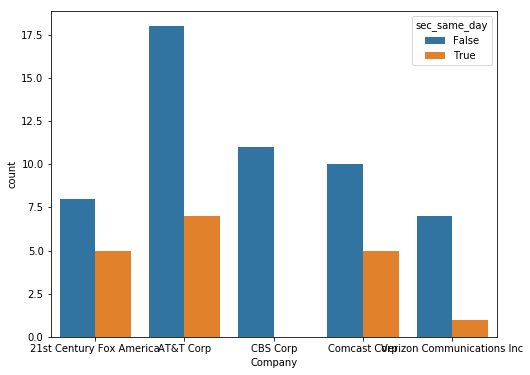

In [21]:
import seaborn as sns
# sns.set(style="darkgrid")

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x='Company', data=df_moody, hue='sec_same_day')

fig.savefig('fig_EDA_Moodys-OAS-stock_same_day_SEC-Moody.pdf')

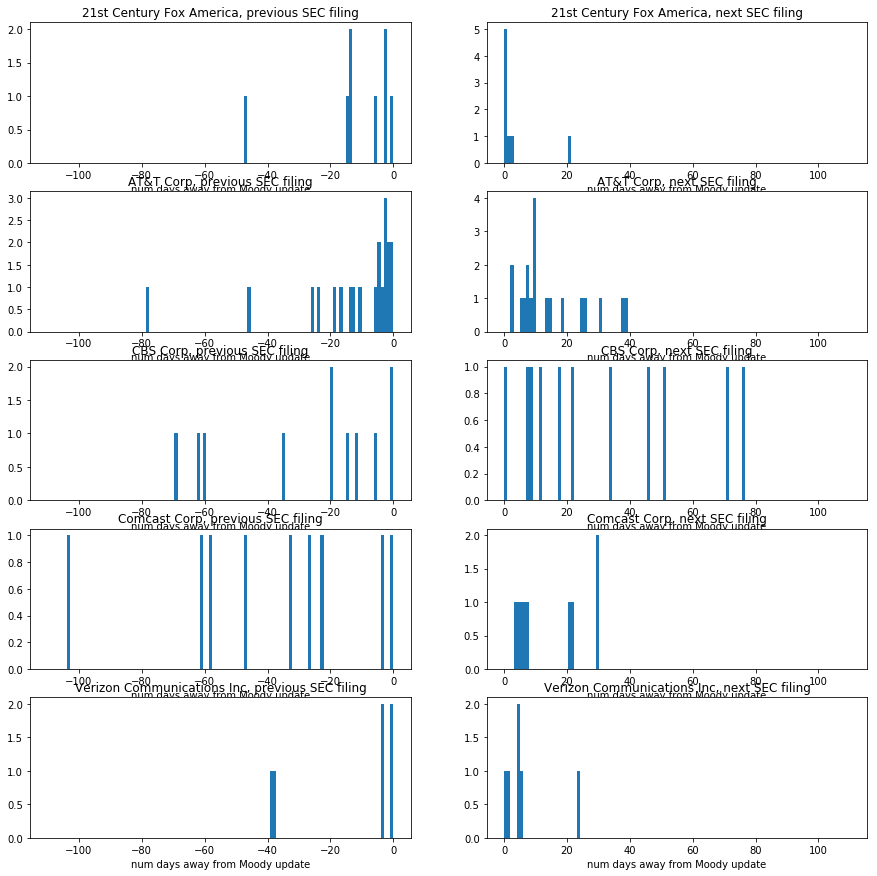

In [22]:
fig, axes = plt.subplots(5,2, figsize=(15,15))
axes = axes.ravel()

for i, comp in enumerate(df_moody.Company.unique()):
    ax = axes[2*i]
    
    df_temp = df_moody[df_moody.Company==comp]
    ax.hist(df_temp.sec_prev[~np.isnan(df_temp.sec_prev)], bins=np.linspace(-110,0,110))
#     ax.set_xlim([-100,0])
    ax.set_title(comp+', previous SEC filing')
    
    
    ax2 = axes[2*i+1]
    ax2.hist(df_temp.sec_next[~np.isnan(df_temp.sec_next)], bins=np.linspace(0,110,110))
#     ax2.set_xlim([0,100])
    ax2.set_title(comp+', next SEC filing')
    
#     if i==9:
    ax.set_xlabel('num days away from Moody update')
    ax2.set_xlabel('num days away from Moody update')
    
plt.show()

fig.savefig('fig_EDA_Moodys-OAS-stock_previous&next_SEC.pdf')

In [23]:
df_moody.to_csv('my_moody.csv')

In [24]:
# How many Moody updates on same day that some SEC filing?

print(sum(df_moody.sec_same_day==True), sum(df_moody.sec_same_day==True)/df_moody.shape[0])

18 0.25


In [25]:
df_dum = df_moody[(df_moody.sec_next<=4) & (df_moody.sec_same_day!=True)]

print(df_dum.shape)
df_dum

(9, 10)


,index,Company,Moody's Rating,Watch,Type,Effective Date,num_rating,sec_same_day,sec_prev,sec_next
5,3,21st Century Fox America,Baa3,-,down,2005-01-25,4,False,-15.0,2.0
6,2,21st Century Fox America,Baa3,+,up,2005-09-22,4,False,-14.0,1.0
10,11,21st Century Fox America,Baa1,-,down,2016-12-12,6,False,-3.0,3.0
23,27,AT&T Corp,Baa2,-,down,2004-06-28,5,False,-11.0,3.0
26,24,AT&T Corp,Baa2,NaN,up,2005-11-18,5,False,-3.0,3.0
41,45,CBS Corp,Baa3,+,up,1999-09-07,4,False,-35.0,1.0
59,53,Comcast Corp,Baa2,+,up,2009-02-09,5,False,-61.0,4.0
66,69,Verizon Communications Inc,A1,-,down,1998-07-28,9,False,-4.0,2.0
71,64,Verizon Communications Inc,Baa1,NaN,down,2013-09-02,6,False,-39.0,1.0


In [26]:
# How many Moody updates with a filing within previous week?

df_dum = df_moody[(df_moody.sec_prev>=-4) & (df_moody.sec_same_day!=True)]

print(df_dum.shape, df_dum.shape[0]/df_moody.shape[0])
df_dum

(14, 10) 0.19444444444444445


,index,Company,Moody's Rating,Watch,Type,Effective Date,num_rating,sec_same_day,sec_prev,sec_next
10,11,21st Century Fox America,Baa1,-,down,2016-12-12,6,False,-3.0,3.0
20,30,AT&T Corp,A2,-,down,2000-11-15,8,False,-2.0,117.0
24,26,AT&T Corp,Ba1,NaN,down,2004-07-29,3,False,-1.0,7.0
26,24,AT&T Corp,Baa2,NaN,up,2005-11-18,5,False,-3.0,3.0
27,23,AT&T Corp,A2,NaN,up,2005-12-19,8,False,-3.0,38.0
29,21,AT&T Corp,A2,NaN,up,2006-07-27,8,False,-2.0,8.0
33,17,AT&T Corp,A3,NaN,down,2013-01-29,7,False,-4.0,6.0
35,15,AT&T Corp,Baa1,NaN,down,2015-02-02,6,False,-3.0,10.0
43,43,CBS Corp,Baa1,+,up,2000-08-16,6,False,-1.0,76.0
44,42,CBS Corp,A3,NaN,up,2000-11-16,7,False,-1.0,18.0


In [27]:
print(df_moody[df_moody.sec_same_day==True].shape)
df_moody[df_moody.sec_same_day==True]

(18, 10)


,index,Company,Moody's Rating,Watch,Type,Effective Date,num_rating,sec_same_day,sec_prev,sec_next
7,1,21st Century Fox America,Baa2,NaN,up,2005-11-21,5,True,-3.0,1.0
8,0,21st Century Fox America,Baa2,+,up,2008-04-16,5,True,-47.0,21.0
9,12,21st Century Fox America,Baa1,NaN,up,2008-06-11,6,True,-1.0,1.0
11,10,21st Century Fox America,Baa1,NaN,up,2016-12-15,6,True,-6.0,1.0
12,9,21st Century Fox America,Baa1,+,up,2017-12-14,6,True,-14.0,1.0
25,25,AT&T Corp,Ba1,+,up,2005-01-31,3,True,-5.0,25.0
28,22,AT&T Corp,A2,-,down,2006-03-06,8,True,-5.0,39.0
30,20,AT&T Corp,A2,-,down,2011-03-21,8,True,-14.0,10.0
31,19,AT&T Corp,A2,NaN,up,2011-12-20,8,True,-1.0,9.0
34,16,AT&T Corp,A3,-,down,2014-05-19,7,True,-17.0,15.0


# SEC type

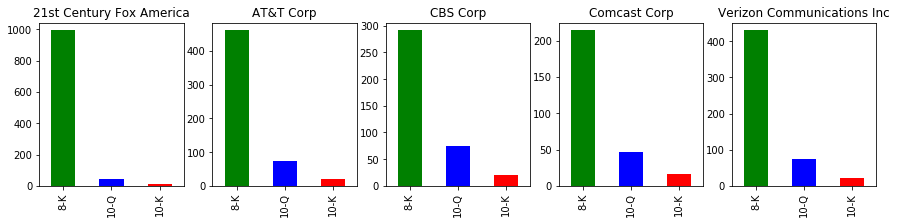

In [28]:
fig, axes = plt.subplots(1,5, figsize=(15,3))
axes = axes.ravel()

for i, comp in enumerate(df_moody.Company.unique()):
    
#     df_temp = df_moody[df_moody.Company==comp]
# #     df_temp.reset_index(inplace=True)

    df_sec = sec_dict[comp].copy()
    
#     print(comp, min(df_sec.fdate), max(df_sec.fdate), df_sec.shape[0], len(df_sec.fdate.unique()))
#     delta = dt.datetime.today()-min(df_sec.fdate)
#     print(delta.days/365)
#     print(df_sec.shape[0]/delta.days*365)
#     print(df_sec.form.value_counts())
    
#     fig, ax = plt.subplots(figsize=(8, 6))

#     print(i)
#     ax = axes[i]
#     sns.countplot(x='form', data=df_sec, ax=axes[i], ).set_title(comp).set_y
    df_sec['form'].value_counts().plot(kind="bar", ax=axes[i], title=comp, color=tuple(["g", "b","r"]))
#     df_sec['doccount'].plot(kind="hist", ax=axes[i], title=comp, bins=np.linspace(0,150,50))
#     df_sec['fsize'].plot(kind="hist", ax=axes[i], title=comp)
#     ax.set_title(comp)

plt.show()
fig.savefig('EDA_figs/fig_EDA_SEC_form.pdf', bbox_inches='tight')

# Other basic checks

In [29]:
for i, comp in enumerate(df_moody.Company.unique()):
    
    df_temp = df_moody[df_moody.Company==comp]
    print(comp,
          df_temp.shape[0],
#           min(df_temp['Effective Date']),
          df_temp.shape[0]/(max(df_temp['Effective Date'])-min(df_temp['Effective Date'])).days*365,
         )

21st Century Fox America 13 0.49873870086188776
AT&T Corp 25 0.6913402530494734
CBS Corp 11 0.638924252068746
Comcast Corp 15 0.5343027227481214
Verizon Communications Inc 8 0.33246043493111693


In [30]:
count = 0

for i, comp in enumerate(df_moody.Company.unique()):
    

    
    df_temp = sec_dict[comp]
    count += len(df_temp.findexdate.unique())
    print(comp,
          df_temp.shape[0],
#           min(df_temp['Effective Date']),
#           len(df_temp.findexdate.unique()),
          df_temp.shape[0]/(max(df_temp.findexdate)-min(df_temp.findexdate)).days*365,
         )

21st Century Fox America 1048 75.68658488326078
AT&T Corp 555 22.659395973154364
CBS Corp 385 15.70638202749525
Comcast Corp 277 17.40788567493113
Verizon Communications Inc 525 21.470588235294116


In [31]:
count = 0

for i, comp in enumerate(df_moody.Company.unique()):
    

    
    df_temp = wsj_dict[comp]
#     count += len(df_temp.date.unique())
    count += df_temp.shape[0]
    print(comp,
          df_temp.shape[0],
#           min(df_temp['Effective Date']),
#           len(df_temp.findexdate.unique()),
          df_temp.shape[0]/(max(df_temp.date)-min(df_temp.date)).days*365,
         )

21st Century Fox America 115 23.502239641657336
AT&T Corp 352 71.6164994425864
CBS Corp 240 49.07563025210084
Comcast Corp 297 61.59375000000001
Verizon Communications Inc 299 58.643202579258464
